# Approximating Contours

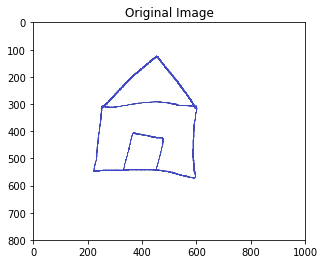

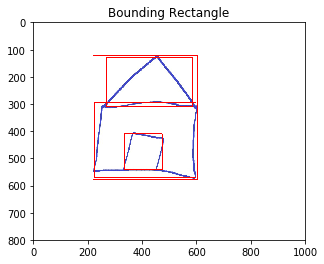

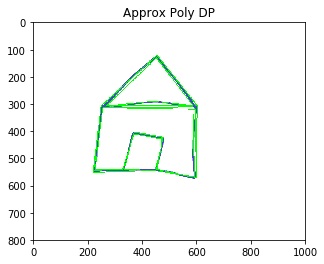

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('../Data/Images/house.jpg')
original_image = image.copy()
cv2.imshow('Original Image', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 200)
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle', image)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Rectangle')
plt.show()

cv2.waitKey(0) 
    

for c in contours:
    # accuracy is the max distance from contour to the aprrox
    # the more accuracy the more distance the more approx or general from contour
    # the less accuracy the less distance so less general -> the closer to the same
    accuracy = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(original_image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', original_image)
    
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Approx Poly DP')
plt.show()
    
    
cv2.waitKey(0)   
cv2.destroyAllWindows()

# Convex Hull

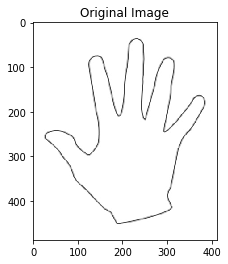

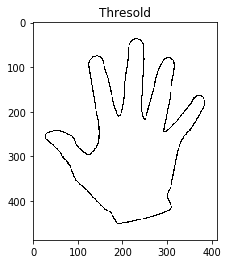

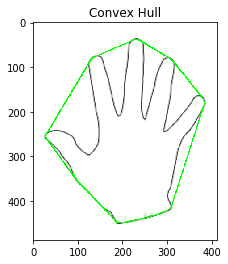

In [5]:
import numpy as np
import cv2

image = cv2.imread('../Data/Images/hand.jpg')
original_image = image.copy()
cv2.imshow('Original Image', image)
cv2.waitKey(0) 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 176, 255, 0)
cv2.imshow('Thresold', thresh)
cv2.waitKey(0)

plt.imshow(thresh, cmap='gray')
plt.title('Thresold')
plt.show()

_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

c = min(contours, key=cv2.contourArea)

hull = cv2.convexHull(c)

cv2.drawContours(original_image, [hull], 0, (0, 255, 0), 2)
cv2.imshow('Convex Hull', original_image)


plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull')
plt.show()

cv2.waitKey(0)   
cv2.destroyAllWindows()

# Convexity Defects

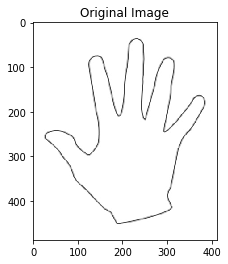

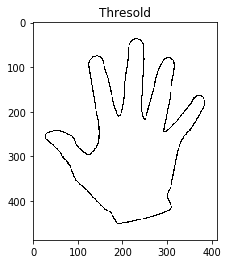

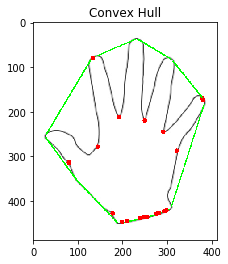

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('../Data/Images/hand.jpg')
original_image = image.copy()
cv2.imshow('Original Image', image)
cv2.waitKey(0) 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 176, 255, 0)
cv2.imshow('Thresold', thresh)
cv2.waitKey(0)

plt.imshow(thresh, cmap='gray')
plt.title('Thresold')
plt.show()

_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

cnt = min(contours, key=cv2.contourArea)

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(original_image,start,end,[0,255,0],2)
    cv2.circle(original_image,far,5,[0,0,255],-1)
    
cv2.imshow('Convex Hull', original_image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull')
plt.show()
   
cv2.destroyAllWindows()